# Imports

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import confusion_matrix
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import math
import os
#print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [2]:
tf.__version__

'1.11.0'

# **Loading data**

In [3]:
# from mnist import MNIST
# data = MNIST(data_dir = 'data/MNIST/')

# from tensorflow.examples.tutorials.mnist import input_data
# mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

mnist = tf.keras.datasets.mnist
(X_train , Y_train ) , (X_test , Y_test) =mnist.load_data()
X_train, X_test = X_train/255.0 , X_test/255.0

In [4]:
print("Size of:")
print("- Training-set:\t\t{}".format(len(X_train)))
print("- Test-set:\t\t{}".format(len(X_test)))

Size of:
- Training-set:		60000
- Test-set:		10000


In [5]:
X_train_images = X_train.reshape(X_train.shape[0],-1)
X_test_images  =  X_test.reshape(X_test.shape[0],-1)

In [6]:
print("The shape of X_train:{}".format(X_train_images.shape))
print("The shape of X_test:{}".format(X_test_images.shape))
print("The shape of Y_train:{}".format(Y_train.shape))
print("The shape of Y_test:{}".format(Y_test.shape))

The shape of X_train:(60000, 784)
The shape of X_test:(10000, 784)
The shape of Y_train:(60000,)
The shape of Y_test:(10000,)


# **One Hot Encoded**

In [7]:
def one_hot_code(x):
    
    encoded = np.zeros((len(x),10))
    for idx , val in enumerate(x):
        encoded[idx][val]=1 
        
    return encoded

In [8]:
Train_labels = one_hot_code(Y_train)
Test_labels = one_hot_code(Y_test)
print("The shape of Y_train_cls:{}".format(Train_labels.shape))
print("The shape of Y_test_cls:{}".format(Test_labels.shape))

The shape of Y_train_cls:(60000, 10)
The shape of Y_test_cls:(10000, 10)


# **Tensorflow Graph**

In [9]:
x = tf.placeholder(tf.float32, [None, (28*28)])
y_true = tf.placeholder(tf.float32, [None, 10])
y_true_cls = tf.placeholder(tf.float32, [None])

# Variables to be Optimized

In [10]:
weights = tf.Variable(tf.zeros([(28*28) , 10]))
biases = tf.Variable(tf.zeros([10]))

# **Model**

In [11]:
logits = tf.matmul(x, weights) + biases

In [12]:
y_pred = tf.nn.softmax(logits)
y_pred_cls = tf.argmax(y_pred, axis=1)
y_pred_cls = tf.to_float(y_pred_cls)

# **Cost Function**

In [13]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,
                                                           labels=y_true)
cost = tf.reduce_mean(cross_entropy)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(cost)

In [14]:
correct_prediction = tf.equal(y_pred_cls, y_true_cls)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Mini Batch Function

In [15]:
def random_mini_batches(X,Y, batch_size):
    
    m = X.shape[0]
    num_of_batches= math.floor(m/batch_size)
    minibatches=[]
    
    for i in range(0,num_of_batches):
        min_X = X[ i*batch_size: (i+1)*batch_size , :]
        min_Y = Y[ i*batch_size: (i+1)*batch_size , :]
    
        mini_batch =(min_X , min_Y)
        minibatches.append(mini_batch)
    
    if m%batch_size !=0:
        min_X = X[:(m-batch_size*num_of_batches), :]
        min_Y = Y[:(m-batch_size*num_of_batches), :]
        
        mini_batch =(min_X , min_Y)
        minibatches.append(mini_batch)
        
    return minibatches

In [16]:
feed_dict_test = {x: X_test_images,
                  y_true: Test_labels,
                  y_true_cls: Y_test}

# Helper Functions

In [17]:
def Optimize(num_iterations):
    
    for i in range(num_iterations):
        miniBATCH = random_mini_batches(X_train_images , Train_labels , 128)
        for batch in miniBATCH:
            (min_X , min_Y) = batch
            sess.run(optimizer , feed_dict={x:min_X , y_true:min_Y})
        if i%20==0:
            print_accuracy()
            
"------------------------------------------------XXXXXXXXXXXXX------------------------------------------------------"
        
def print_accuracy():
    # Use TensorFlow to compute the accuracy.
    acc = sess.run(accuracy, feed_dict=feed_dict_test)
    
    # Print the accuracy.
    print("Accuracy on test-set: {0:.1%}".format(acc))
    

"-------------------------------------------------XXXXXXXXXXXXX-------------------------------------------------------"

def print_confusion_matrix():
    
    cls_true = Y_test
    class_pred= sess.run(y_pred_cls , feed_dict=feed_dict_test)
    
    cm = confusion_matrix(cls_true, class_pred)
    print(cm)
    
    plt.imshow(cm , interpolation='nearest' , cmap= plt.cm.Blues )
    
    plt.tight_layout()
    plt.colorbar()
    tick_marks = np.arange(10)
    plt.xticks(tick_marks, range(10))
    plt.yticks(tick_marks, range(10))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()
    

"------------------------------------------------------XXXXXXXXXXXXXXXXXXXXXX------------------------------------------"    
    
        
            
def plot_images(image , cls_true , cls_pred):
    
    assert len(image) == len(cls_true)==9
    fig , axes = plt.subplots(3,3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
    
    for i , axe in enumerate(axes.flat):
        axe.imshow(image[i] , cmap='binary')
        
        if cls_pred is not None:
            xlabel = 'True:{}  Pred:{}'.format(cls_true[i] , cls_pred[i])
        else:
            xlabel = 'True:{}'.format(cls_true[i])
            
        
        axe.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        axe.set_xticks([])
        axe.set_yticks([])
        
        
    plt.show()
    

    
"-------------------------------------------XXXXXXXXXXXXXXXXXXXXXXX-------------------------------------------------"
    

def plot_example_errors():
    
    correct , cls_pred = sess.run([correct_prediction , y_pred_cls], feed_dict=feed_dict_test)
    # Negate the boolean array.
    incorrect = (correct == False)
    
    
    # Get the images from the test-set that have been
    # incorrectly classified.
    images = X_test[incorrect]
    cls_true = Y_test[incorrect]
    # Get the predicted classes for those images.
    pred = cls_pred[incorrect]

    plot_images(image=images[0:9],
                cls_true=cls_true[0:9],
                cls_pred=pred[0:9])
    
    
"------------------------------------------------------------XXXXXXXXXXXXXXXXXXX----------------------------------------"

def plot_weights():
    # Get the values for the weights from the TensorFlow variable.
    w = sess.run(weights)
    
    # Get the lowest and highest values for the weights.
    # This is used to correct the colour intensity across
    # the images so they can be compared with each other.
    w_min = np.min(w)
    w_max = np.max(w)

    # Create figure with 3x4 sub-plots,
    # where the last 2 sub-plots are unused.
    fig, axes = plt.subplots(2, 5)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Only use the weights for the first 10 sub-plots.
        if i<10:
            # Get the weights for the i'th digit and reshape it.
            # Note that w.shape == (img_size_flat, 10)
            image = w[:, i].reshape(28,28)

            # Set the label for the sub-plot.
            ax.set_xlabel("Weights: {0}".format(i))

            # Plot the image.
            ax.imshow(image, vmin=w_min, vmax=w_max, cmap='seismic')

        # Remove ticks from each sub-plot.
        ax.set_xticks([])
        ax.set_yticks([])
        
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()
    



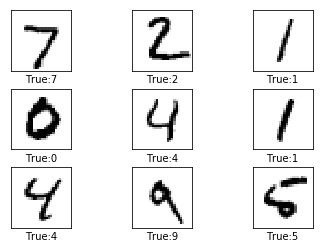

In [18]:
# Get the first images from the test-set.
images = X_test[0:9]

# Get the true classes for those images.
cls_true = Y_test[0:9]

# Plot the images and labels using our helper-function above.
plot_images(image=images, cls_true=cls_true ,cls_pred=None)

In [19]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [20]:
Optimize(200)

Accuracy on test-set: 90.3%
Accuracy on test-set: 91.8%
Accuracy on test-set: 91.8%
Accuracy on test-set: 91.7%
Accuracy on test-set: 91.8%
Accuracy on test-set: 91.8%
Accuracy on test-set: 91.7%
Accuracy on test-set: 91.7%
Accuracy on test-set: 91.7%
Accuracy on test-set: 91.7%


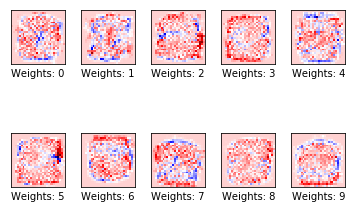

In [21]:
plot_weights()

[[ 957    0    0    2    1   13    3    3    1    0]
 [   0 1121    4    1    0    2    3    1    3    0]
 [   8   16  910   24   11    7   11   11   30    4]
 [   4    2   15  891    2   56    2   10   15   13]
 [   1    3    5    3  903    0    8    4    6   49]
 [   7    3    2   16    7  819   11    5   19    3]
 [  10    4    7    2    4   36  892    2    1    0]
 [   1   10   21    5    6    3    0  925    2   55]
 [   9   17    6   26    8   61    9   11  806   21]
 [   8    8    1    7   16   12    0   10    2  945]]


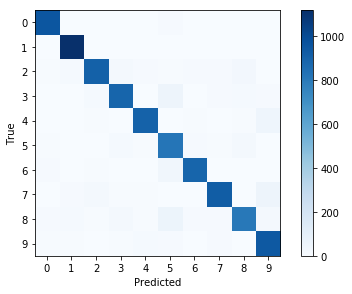

In [22]:
print_confusion_matrix()

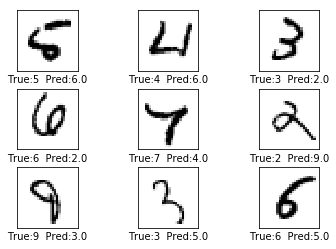

In [23]:
plot_example_errors()